In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Data import and first acquaintance with data

In [29]:
df_orders = pd.read_csv('Food Demand Dataset/food_demand.csv')#, index_col="id")
# df_orders = df_orders.rename_axis(None)

df_orders.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [30]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [31]:
df_orders.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [32]:
df_centers = pd.read_csv('Food Demand Dataset/fulfilment_center_info.csv')
df_centers.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [33]:
df_centers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [34]:
df_meals = pd.read_csv('Food Demand Dataset/meal_info.csv')
df_meals.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [35]:
df_meals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


2. Data cleaning

Thanks to info method we can see:
1) Some text features are presented in object format, which requires data type conversion for analysis;
2) There is no one column in all three tables that has NaN value;

2.1. Delete unnecessary columns

There is no need for emailer_for_promotion and homepage_featured columns for the analysis

In [36]:
del df_orders['emailer_for_promotion']
del df_orders['homepage_featured']

2.2. Check for duplicates

In [37]:
df_orders.drop_duplicates()
len(df_orders)

456548

In [38]:
df_centers.drop_duplicates()
len(df_centers)

77

In [39]:
df_meals.drop_duplicates()
len(df_meals)

51

The number of lines before and after cleaning is the same, which means there are no duplicate column/row values ​​in the tables

2.3. Data type conversion

object format -> text format

In [40]:
df_centers['center_type'] = df_centers['center_type'].astype('string')
df_meals[['category', 'cuisine']] = df_meals[['category', 'cuisine']].astype('string')

2.4. Checking categorical values

Check that all values ​​are of the same type (TYPE_A =! Type_A)

In [41]:
# For dataset of centers
print(df_centers['center_type'].value_counts().sort_index())

center_type
TYPE_A    43
TYPE_B    15
TYPE_C    19
Name: count, dtype: Int64


In [42]:
# For dataset of meals
print(df_meals['category'].value_counts().sort_index())
print(df_meals['cuisine'].value_counts().sort_index())

category
Beverages       12
Biryani          3
Desert           3
Extras           3
Fish             3
Other Snacks     3
Pasta            3
Pizza            3
Rice Bowl        3
Salad            3
Sandwich         3
Seafood          3
Soup             3
Starters         3
Name: count, dtype: Int64
cuisine
Continental    12
Indian         12
Italian        12
Thai           15
Name: count, dtype: Int64


2.5. Non-unique values

Such values as id should be unique and shpuldn't have different information in the same columns

In [43]:
print('Number of unique centers id in dataset of centers:', len(df_centers['center_id'].unique()))
print('Number of unique meals id in dataset of meals:', len(df_meals['meal_id'].unique()))

Number of unique centers id in dataset of centers: 77
Number of unique meals id in dataset of meals: 51


Number of RangeIndexes of both tables (51 and 77 entries) matches the number of unique id, what means that the two records do not have the same id

2.6. Inconsistency check

Compare the ID values ​​of different tables to understand that we have information on all centers and types of meals, and also do not have an outsourcer

In [44]:
centers_orders = set(df_orders['center_id'].unique())
centers_centers = set(df_centers['center_id'].unique())
missing_centers = centers_centers - centers_orders

if missing_centers:
    print(f"Found center_id from dataset of orders info that are not in dataset of centers: {missing_centers}")
else:
    print("All center_id from dataset of orders info found in dataset of centers")

All center_id from dataset of orders info found in dataset of centers


In [45]:
meals_orders = set(df_orders['meal_id'].unique())
meals_meals = set(df_meals['meal_id'].unique())
missing_meals = meals_meals - meals_orders

if missing_meals:
    print(f"Found meal_id from dataset of orders info that are not in dataset of meals: {missing_meals}")
else:
    print("All meal_id from dataset of orders info found in dataset of meals")

All meal_id from dataset of orders info found in dataset of meals


2.7. Merge tables

In [52]:
df = df_orders.merge(df_meals, on='meal_id', how='left')
df = df.merge(df_centers, on='center_id', how='left')
df = df.rename(columns={'id': 'order_id', 'num_orders': 'num_products'})
df

,order_id,week,center_id,meal_id,checkout_price,base_price,num_products,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,40,Beverages,Indian,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,68,Desert,Indian,473,77,TYPE_A,4.5
456544,1062036,145,61,2304,482.09,482.09,42,Desert,Indian,473,77,TYPE_A,4.5
456545,1110849,145,61,2664,237.68,321.07,501,Salad,Italian,473,77,TYPE_A,4.5
456546,1147725,145,61,2569,243.50,313.34,729,Salad,Italian,473,77,TYPE_A,4.5


3. Analysis

3.1. Analysis of product range and popularity

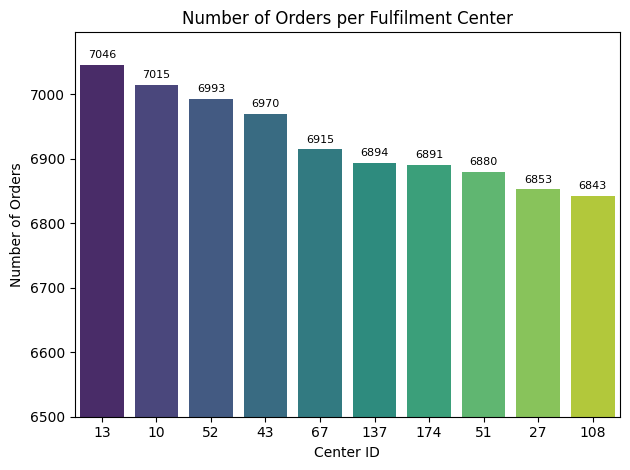

In [ ]:
center_num_orders = df.groupby('center_id')['order_id'].count().reset_index(name = 'num_orders')
center_num_orders = center_num_orders.sort_values(by = 'num_orders', ascending = False).reset_index(drop = True)

top_10_centers_orders = center_num_orders.head(10).copy()
top_10_centers_orders['center_id'] = top_10_centers_orders['center_id'].astype(str) # because sns automatically distributes x in ascending order

# Barplot
sns.barplot(data = top_10_centers_orders, x = 'center_id', y = 'num_orders', hue = 'center_id', palette = 'viridis')

plt.xlabel("Center ID")
plt.ylabel("Number of Orders")
plt.title("Number of Orders per Fulfilment Center")
plt.ylim(6500, top_10_centers_orders['num_orders'].max() + 50)
for index, row in top_10_centers_orders.iterrows():
    plt.text(
        x = index, 
        y = row['num_orders'] + 10,
        s = row['num_orders'], 
        ha = 'center', fontsize = 8, color = 'black')
plt.tight_layout()

plt.show()


In [94]:
center_num_meals = df.groupby('center_id')['num_products'].sum().reset_index()
center_num_meals = center_num_meals.sort_values(by = 'num_products', ascending = False).reset_index(drop = True)
# center_num_meals

top_10_centers_meals = center_num_meals.head(10).copy()
top_10_centers_meals['center_id'] = top_10_centers_meals['center_id'].astype(str)
top_10_centers_meals

,center_id,num_products
0,13,4296545
1,43,3920294
2,10,3381018
3,52,3125835
4,137,3117478
5,67,2839493
6,11,2797300
7,174,2792587
8,104,2427542
9,27,2297698


3.2. Financial analysis

In [95]:
center_num_costs = df.groupby('center_id')['checkout_price'].sum().reset_index(name = 'Total costs')
center_num_costs = center_num_costs.sort_values(by = 'Total costs', ascending = False).reset_index(drop = True)
# center_num_costs

top_10_centers_costs = center_num_costs.head(10).copy()
top_10_centers_costs['center_id'] = top_10_centers_costs['center_id'].astype(str)
top_10_centers_costs

,center_id,Total costs
0,13,2359955.83
1,10,2354344.08
2,52,2334179.13
3,43,2320691.78
4,67,2312605.02
5,174,2312448.14
6,137,2300653.24
7,51,2280381.36
8,27,2267799.91
9,108,2258540.02
